# Autonomous demon exploiting heat and information at the trajectory level

J. Monsel, M. Acciai, R. Sanchez, J. Splettstoesser, [arXiv:2409.05823](http://arxiv.org/abs/2409.05823)

In the files we use the folowing notation for the parameters (see article for the definitions):

* `GC, GH, GL00, GR01, GR10`: tunnel rates $\Gamma_\mathrm{C}, \Gamma_\mathrm{H}, \Gamma_\mathrm{L}^{00}, \Gamma_\mathrm{R}^{01}, \Gamma_\mathrm{R}^{10}$
* `eC, eH, eW`: energy levels $\epsilon_\mathrm{C}, \epsilon_\mathrm{H}, \epsilon_\mathrm{W}$ of the dots C, H and W 
* `UC, UH`: interdot Coulomb interactions $U_\mathrm{C}, U_\mathrm{H}$
* `TC, TH, TL, TR` and `bC, bH, bL, bR`: temperatures $T_\alpha$ of the reservoirs and correpsonding inverse temperatures $\beta_\alpha$


In [1]:
import os
import re
import inspect  
from importlib import import_module
from glob import glob
import numpy as np
from numpy import exp, log, sqrt
from scipy import optimize as sco
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerTuple
%matplotlib widget

# avoid big error messages when there are invalid values in sqrt or log
import warnings
warnings.filterwarnings('ignore')

module = import_module("three_dots_fct")

latex_preamble = r"""
\usepackage{amsmath}
\usepackage{times}
\newcommand*{\e}{\text{e}}
\newcommand*{\kB}{k_\text{B}}
\newcommand*{\Tr}{\text{Tr}}
\renewcommand*{\P}{\mathbf{P}}
\newcommand*{\bP}{\mathbf{\bar{P}}}
\newcommand*{\C}{\text{C}}
\newcommand*{\D}{\text{D}}
\renewcommand*{\H}{\text{H}}
\newcommand*{\W}{\text{W}}
\renewcommand*{\L}{\text{L}}
\newcommand*{\R}{\text{R}}
\newcommand*{\Jin}{J^Q_\text{in}}
\newcommand*{\JC}{J^Q_\C}
\newcommand*{\JH}{J^Q_\H}
\newcommand*{\JL}{J^Q_\L}
\newcommand*{\JR}{J^Q_\R}
\newcommand*{\Pcool}{\mathcal{P}_\text{cool}}
\newcommand*{\Scool}{\mathcal{S}_\text{cool}}
\newcommand*{\cI}{I}
\newcommand*{\cC}{\mathcal{C}}
\newcommand*{\cP}{\mathcal{P}}
\newcommand*{\tcC}{\tilde{\mathcal{C}}}
\newcommand*{\CC}{\cC_\C}
\newcommand*{\tCC}{\tcC_\C}
\newcommand*{\CH}{\cC_\H}
\newcommand*{\tCH}{\tcC_\H}
\newcommand*{\CHC}{\cC_{\H\C}}
\newcommand*{\tCHC}{\tcC_{\H\C}}
\newcommand*{\FC}{F^\C}
\newcommand*{\FH}{F^\H}
\newcommand*{\GC}{\Gamma_\C}
\newcommand*{\GH}{\Gamma_\H}
\newcommand*{\GL}{\Gamma_\L}
\newcommand*{\GR}{\Gamma_\R}
\newcommand*{\UC}{U_\C}
\newcommand*{\UH}{U_\H}
\newcommand*{\bC}{\beta_\C}
\newcommand*{\bH}{\beta_\H}
\newcommand*{\bL}{\beta_\L}
\newcommand*{\bR}{\beta_\R}
\newcommand*{\eC}{\epsilon_\C}
\newcommand*{\eH}{\epsilon_\H}
\newcommand*{\eW}{\epsilon_\W}
\newcommand*{\Dmu}{\Delta\mu}
\newcommand*{\GCop}{\GC^{0+}}
\newcommand*{\GCip}{\GC^{1+}}
\newcommand*{\GCom}{\GC^{0-}}
\newcommand*{\GCim}{\GC^{1-}}
\newcommand*{\GHop}{\GH^{0+}}
\newcommand*{\GHip}{\GH^{1+}}
\newcommand*{\GHom}{\GH^{0-}}
\newcommand*{\GHim}{\GH^{1-}}
\newcommand*{\GRoip}{\GR^{01+}}
\newcommand*{\GRiop}{\GR^{10+}}
\newcommand*{\GRoim}{\GR^{01-}}
\newcommand*{\GRiom}{\GR^{10-}}
\newcommand*{\GLoop}{\GL^{00+}}
\newcommand*{\GLoom}{\GL^{00-}}
\newcommand*{\g}{\gamma^5}
\newcommand*{\gC}{\gamma_\C^2}
\newcommand*{\gH}{\gamma_\H^2}
\newcommand*{\gCC}{\gamma_{\CC}^4}
\newcommand*{\gbCC}{\gamma_{\tCC}^4}
\newcommand*{\gCH}{\gamma_{\CH}^4}
\newcommand*{\gbCH}{\gamma_{\tCH}^4}
\newcommand*{\gCHC}{\gamma_{\CHC}^6}
\newcommand*{\gbCHC}{\gamma_{\tCHC}^6}
\newcommand*{\rC}{r_{\cC}}
\newcommand*{\rCC}{r_{\CC}}
\newcommand*{\rbCC}{r_{\tCC}}
\newcommand*{\rCH}{r_{\CH}}
\newcommand*{\rbCH}{r_{\tCH}}
\newcommand*{\rCHC}{r_{\CHC}}
\newcommand*{\rbCHC}{r_{\tCHC}}
\newcommand*{\p}{\bar{p}}
\newcommand*{\T}{\bar{T}}
\newcommand*{\dT}{\delta T}
\newcommand*{\TL}{T_\mathrm{L}}
\newcommand*{\TR}{T_\mathrm{R}}
\newcommand*{\THot}{T_\mathrm{H}}
\newcommand*{\TCold}{T_\mathrm{C}}
\newcommand*{\etaG}{\eta_\text{global}}
\newcommand*{\etaI}{\eta_\text{info}}
"""

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=latex_preamble)
plt.rc('legend', handlelength=1)
plt.rc('font', **{'family': 'Liberation Sans', 'size': 16})
plt.rc('savefig', dpi=200)
plt.rc('axes.formatter', limits=(-3, 2), use_locale=False)
plt.rc('legend', fontsize=16, handlelength=1, handletextpad=0.5, borderpad=0.2)
plt.rc('axes', labelsize=16)
plt.rc('figure', titlesize='medium')
plt.rc('axes', titlesize='medium')

HOT = "#D65656"
COLD = "#5167C9"
MIX = "C4"

BLEU = "#1732a6"
ROUGE = "#BB0909"
VERT = "#008000"

In [2]:
# parameter class

class Params:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        self._init_kwargs = kwargs.copy()  # initially supplied kwargs
        if "bT" in kwargs:
            self.TL = self.bT + self.dT
            self.TR = self.bT - self.dT
        else:
            self.bT = (self.TL + self.TR)/2
            self.dT = (self.TL - self.TR)/2
        self.bL = 1/self.TL
        self.bR = 1/self.TR
        self.bC = 1/self.TC
        self.bH = 1/self.TH

    def __repr__(self):
        return f"Params({dict(**self)})"

    def __getattr__(self, attr):
        try:
            return getattr(self.__dict__, attr)
        except AttributeError:  # not one of the parameters
            # return the function from module with the system's parameters in argument
            func = getattr(module, attr)
            args = inspect.getfullargspec(func).args

            def func2(**kw):
                for arg in args:
                    if arg in self:
                        kw.setdefault(arg, self[arg])
                return func(**kw)

            return func2

    def __contains__(self, key):
        return key in self.__dict__

    def __getitem__(self, key):
        return self.__dict__[key]

    def __setitem__(self, key, value):
        self.__dict__[key] = value

    def get(self, names):
        """names = 'var1, var2, ..., varN'"""
        lnames = [n.strip() for n in names.split(',')]
        values = tuple(self.__dict__[name] for name in lnames)
        return values

    def get_pars(self):
        return self._init_kwargs.copy()


basis = ['000', '001', '010', '011', '100', '110']

In [3]:
# initial set of parameters

dt = 0.001  # trajectory timestep
tf = 20000  # trajectory total duration

bT = 8
dT = 1
UC = 12

pars_dict0 = dict(
    TH = 16,
    TL = bT + dT,
    TR = bT - dT,
    TC = 4,
    eW = -0.5,
    eC = -UC/2,
    eH = 0,
    UC = UC,
    UH = UC*3,
    GH = 1,
    GC = 1,
    GR00 = 0,
    GR01 = 0.01,
    GR10 = 0.01,
    GL00 = 0.01,
    GL01 = 0,
    GL10 = 0,
    mu = 0,
)
pars0 = Params(**pars_dict0)

print("Not demon condition yet:")
print(f"J^Q_in = {pars0.JQin():.3e}")
# set demon conditions
pars_dict0["eH"] = pars0.demon_cond_eH()
pars0 = Params(**pars_dict0)
print("Change eH to get demon condition:")
print(f"J^Q_in = {pars0.JQin():.3e}")

Not demon condition yet:
J^Q_in = 7.941e-04
Change eH to get demon condition:
J^Q_in = 8.674e-19


## Cooling power optimization

We operate at $\mu_R = 0$, therefore $\mathcal{P}_\mathrm{cool} = J^Q_R = J^E_R$

Here we maximize the cooling power on $\epsilon_C$, $\epsilon_W$ while $\epsilon_H$ is used to get the demon condition.

Note that to make those functions faster, one can compile with [numba](https://numba.pydata.org/) the functions from `module`(`three_dots_fct.py`).

In [4]:
def maximize_Pcool_eC_eW(GC, GH, GL00, GR01, GR10, UC, UH, bC, bH, bL, bR, tol=1e-9, x0=(2*UC, -0.1*UC), method="BFGS"):
    """
    Return max. Pcool and corresponding eC, eW (eH at demon condition).

    x0: initial guess for eC, eW
    tol, method: see scipy.optimize.minimize documentation
    """
    args = (GC, GH, GL00, GR01, GR10, UC, UH, bC, bH, bL, bR)
    def mPcool(x):
        eC, eW = x
        try:
            eH = module.demon_cond_eH(*args, eC, eW, 0)
        except ZeroDivisionError:
            return np.nan
        return -module.JER(*args, eC, eH, eW, 0)

    res = sco.minimize(mPcool, x0, tol=tol, method=method)
    assert res.success

    return -res.fun, res.x[0], res.x[1]


def maximize_Pcool_eC_eW_UH(GC, GH, GL00, GR01, GR10, UC, bC, bH, bL, bR, tol=1e-9, x0=(2*UC, -0.1*UC, 4*UC), method="BFGS"):
    """
    Return max. Pcool and corresponding eC, eW, UH (eH at demon condition).

    x0: initial guess for eC, eW, UH
    tol, method: see scipy.optimize.minimize documentation
    """
    args1 = [GC, GH, GL00, GR01, GR10, UC]
    args2 = [bC, bH, bL, bR]

    def mPcool(x):
        eC, eW, UH = x
        try:
            eH = module.demon_cond_eH(*args1, UH, *args2, eC, eW, 0)
        except ZeroDivisionError:
            return np.nan
        return -module.JER(*args1, UH, *args2, eC, eH, eW, 0)

    res = sco.minimize(mPcool, x0, tol=tol, method=method, bounds=((-np.inf, np.inf), (-np.inf, np.inf), (0, np.inf)))
    assert res.success

    return -res.fun, *res.x


def maximize_Pcool_eC_eW_UH_2(GC, GH, GL00, GR01, GR10, UC, bC, bH, bL, bR, tol=1e-9, x0=(2*UC, -0.1*UC), method="Nelder-Mead"):
    """
    Return max. Pcool and corresponding eC, eW, UH (eH at demon condition) for UH > UC and UH < UC (as two tuples)

    x0: initial guess for eC, eW
    tol, method: see scipy.optimize.minimize documentation
    """

    args1 = [GC, GH, GL00, GR01, GR10, UC]
    args2 = [bC, bH, bL, bR]
    
    def mPcool(x):
        eC, eW, UH = x
        try:
            eH = module.demon_cond_eH(*args1, UH, *args2, eC, eW, 0)
        except ZeroDivisionError:
            return np.nan
        return -module.JER(*args1, UH, *args2, eC, eH, eW, 0)

    res1 = sco.minimize(mPcool, x0 + (4*UC,), tol=tol, method=method, bounds=((-np.inf, np.inf),(-np.inf, np.inf), (UC, np.inf)))
    res2 = sco.minimize(mPcool, x0 + (0.75*UC,), tol=tol, method=method, bounds=((-np.inf, np.inf),(-np.inf, np.inf), (0, UC)))

    if res1.success and res1.x[-1] > UC:
        out1 = (-res1.fun, *res1.x)
    else:
        out1 = (np.nan, )*4

    if res2.success and res2.x[-1] < UC:
        out2 = (-res2.fun, *res2.x)
    else:
        out2 = (np.nan, )*4

    return out1, out2



Parameters for cases (I) and (II):

In [5]:
# (I)
pars_dict1 = pars_dict0.copy()

Pm, eC, eW, UH = maximize_Pcool_eC_eW_UH(*pars0.get("GC, GH, GL00, GR01, GR10, UC, bC, bH, bL, bR"), x0=(2*UC, -0.14*UC, 5*UC), method="Nelder-Mead")
pars_dict1["eW"] = eW
pars_dict1["eC"] = eC
pars_dict1["UH"] = UH
pars1 = Params(**pars_dict1)
pars_dict1["eH"] = pars1.demon_cond_eH()
pars1 = Params(**pars_dict1)

# (II)
pars_dict2 = pars_dict0.copy()
pars_dict2["UH"] = 0.72*UC
pars2 = Params(**pars_dict2)

Pm, eC, eW = maximize_Pcool_eC_eW(*pars2.get("GC, GH, GL00, GR01, GR10, UC, UH, bC, bH, bL, bR"), x0=(2*UC, -0.14*UC), method="Nelder-Mead")
pars_dict2["eC"] = eC
pars_dict2["eW"] = eW
pars2 = Params(**pars_dict2)
pars_dict2["eH"] = pars2.demon_cond_eH()
pars2 = Params(**pars_dict2)


plot max cooling power as a function of $U_H$:

In [6]:
try:
    data = np.load("maxPcool_func_UH.npz")
except FileNotFoundError:
    UHs = np.concatenate((np.linspace(0.01, 2, 100), np.linspace(2, 15, 50)[1:]))*UC
    kwargs = {p: pars0[p] for p in "GC, GH, GL00, GR01, GR10, UC, bC, bH, bL, bR".split(", ")}
    
    Pcool_max, eC_max, eW_max = np.zeros((3, len(UHs)))
    errs = []
    for i, UH in enumerate(UHs):
        try:
            Pcool_max[i], eC_max[i], eW_max[i] = maximize_Pcool_eC_eW(**kwargs, UH=UH, x0=(2*UC, -0.14*UC), method="Nelder-Mead")
        except AssertionError:
            print("error", UH/UC)
            errs.append(UH)
    eCm = eC_max[Pcool_max>0]
    eWm = eW_max[Pcool_max>0]
    eHm = pars0.demon_cond_eH(eC=eCm, eW=eWm, UH=UHs[Pcool_max>0])
    
    etaG = pars0.eta_global(eC=eCm, eW=eWm, eH=eHm, UH=UHs[Pcool_max>0])
    etaI = pars0.eta_info(eC=eCm, eW=eWm, eH=eHm, UH=UHs[Pcool_max>0]).flatten()
    
    Scool = pars0.S_JERJER(eC=eCm, eW=eWm, UH=UHs[Pcool_max>0], eH=eHm)
    rho = pars0.rho_ss(eC=eCm, eW=eWm, UH=UHs[Pcool_max>0], eH=eHm).reshape((6, eWm.shape[0]))
    dSig = pars0.dSig(eC=eCm, eW=eWm, UH=UHs[Pcool_max>0], eH=eHm)
    XTUR_G = Pcool_max[Pcool_max>0]*etaG/(1-etaG)*pars0.TR/Scool
    XTUR_I = Pcool_max[Pcool_max>0]*etaI/(1-etaI)*pars0.TR/Scool

    kwds = pars0.get_pars()
    kwds["eC"] = eCm
    kwds["eH"] = eHm
    kwds["eW"] = eWm
    kwds["UH"] = UHs[Pcool_max>0]

    np.savez_compressed("maxPcool_func_UH.npz", **kwds, Pcool=Pcool_max[Pcool_max>0], Scool=Scool,
                        etaG=etaG, etaI=etaI, XTUR_G=XTUR_G, XTUR_I=XTUR_I)
    data = np.load("maxPcool_func_UH.npz")

x = data.f.UH/data.f.UC

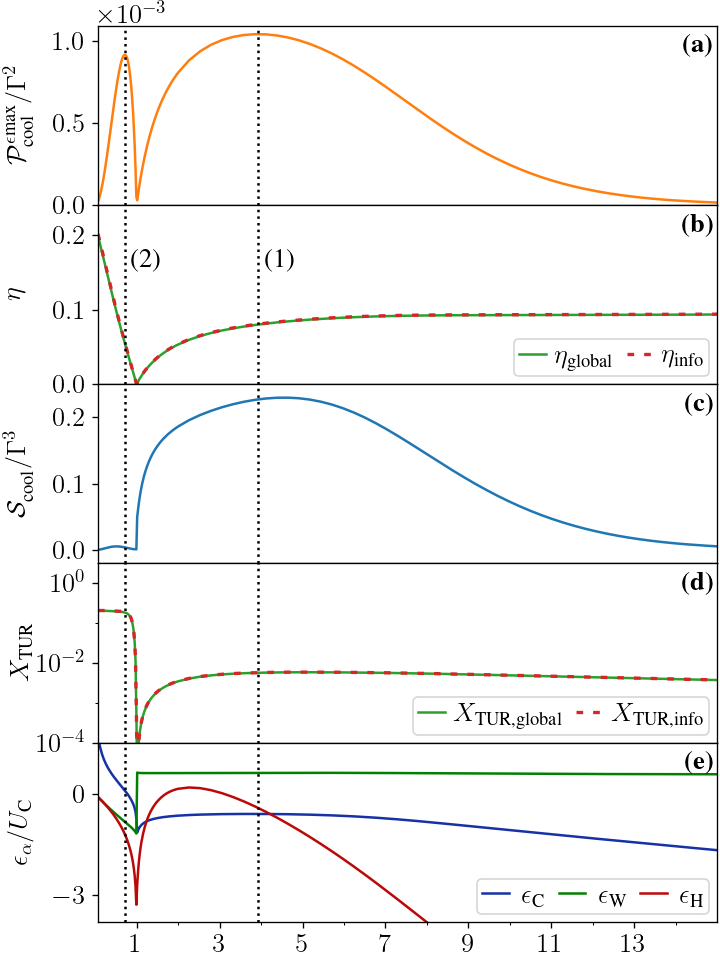

In [7]:
num = "fig_max_power"
plt.close(num)
fig, axs = plt.subplots(5, 1, sharex=True, num=num, figsize=(6, 8))
(ax0, ax2, ax1, ax3, ax4) = axs
p0 = ax0.plot(x, data.f.Pcool, "C1-", label=r"$\Pcool^{\epsilon\text{max}}$")[0]

p1 = ax1.plot(x, data.f.Scool, "-", label=r"$ S_\text{cool}$")[0]
p0 = ax2.plot(x, data.f.etaG, "C2", label=r"$\etaG$")[0]
p1 = ax2.plot(x, data.f.etaI, "C3", ls=(0, (2, 3)), lw=2, label=r"$\etaI$")[0]

ps2 = [p0, p1]
ax2.legend(ps2, [p.get_label() for p in ps2], ncol=3, loc="lower right",
           columnspacing=0.5, handletextpad=0.3, handlelength=1,
           fontsize=16)

p0 = ax3.semilogy(x, data.f.XTUR_G*2, "C2", label=r"$X_\text{TUR,global}$")[0]
p1 = ax3.semilogy(x, data.f.XTUR_I*2, "C3", ls=(0, (2, 3)), lw=2, label=r"$X_\text{TUR,info}$")[0]

ps3 = [p0, p1]
ax3.legend(ps3, [p.get_label() for p in ps3], ncol=3, loc="lower right",
           columnspacing=0.5, handletextpad=0.3, handlelength=1,
           fontsize=16)

ax4.plot(x, data.f.eC/data.f.UC, color=BLEU, label=r"$\eC$")
ax4.plot(x, data.f.eW/data.f.UC, color=VERT, label=r"$\eW$")
ax4.plot(x, data.f.eH/UC, color=ROUGE, label=r"$\eH$")
ax4.legend(ncol=3, loc="lower right", columnspacing=0.5)

ax3.set_xlabel(r"$\UH/\UC$", labelpad=2)
ax3.set_ylabel(r"$X_\text{TUR}$", labelpad=2)
ax2.set_ylabel(r"$\eta$", labelpad=16)
ax0.set_ylabel(r"$\Pcool^{\epsilon\text{max}}/\Gamma^2$", labelpad=12)
ax1.set_ylabel(r"$\Scool^{}/\Gamma^3$", labelpad=12)
ax4.set_ylabel(r"$\epsilon_\alpha/\UC$", labelpad=11)
ax0.set_ylim(0, ax0.get_ylim()[1])
ax1.set_ylim(0, ax1.get_ylim()[1])
ax0.set_xlim(data.f.UH.min()/data.f.UC, data.f.UH.max()/data.f.UC)
ax0.set_xticks(np.arange(1, data.f.UH.max()/data.f.UC, 2))
ax0.set_xticks(np.arange(2, data.f.UH.max()/data.f.UC, 2), minor=True)
ax2.set_ylim(0, 0.24)
ax1.set_ylim(-0.02, (0.25))
ax3.set_ylim(1e-4, 3)
ax3.set_yticks([1e-4, 1e-2, 1])
ax3.set_yticks([1e-3, 1e-1], minor=True)
ax3.set_yticklabels([], minor=True)
ax4.set_yticks([-3, 0])
ax4.set_ylim(-3.8, 1.53)

for ax, lbl in zip(axs, "abcde"):
    ylim = ax.get_ylim()
    ax.plot(np.ones(2)*pars1.UH/pars1.UC, ylim, "k:")
    ax.plot(np.ones(2)*pars2.UH/pars2.UC, ylim, "k:")
    ax.set_ylim(ylim)
    ax.text(0.995, 0.95, r"\textbf{(%s)" % lbl, va="top", ha="right", transform=ax.transAxes)

ax2.text(pars1.UH/pars1.UC + 0.15, 0.18, "(1)", ha="left", va="top")
ax2.text(pars2.UH/pars2.UC + 0.15, 0.18, "(2)", ha="left", va="top")

fig.tight_layout(pad=0.1)
fig.subplots_adjust(hspace=0)

Maximum cooling power as a function of $U_C$

In [8]:
try:
    data = np.load("maxPcool_func_UC.npz")
except FileNotFoundError:
    pars = pars0
    UCs = np.linspace(0.1, 5, 500)*pars.TH

    Pcool_max1, eC_max1, eW_max1, UH_max1 = np.zeros((4, len(UCs)))
    Pcool_max2, eC_max2, eW_max2, UH_max2 = np.zeros((4, len(UCs)))
    errs = []
    for i, UC in enumerate(UCs):
        kwargs = {p: pars[p] for p in "GC, GH, GL00, GR01, GR10, bC, bH, bL, bR".split(", ")}
        out1, out2 = maximize_Pcool_eC_eW_UH_2(**kwargs, UC=UC, x0=(4*UC, -0.14*UC), method="Nelder-Mead")

        if np.isnan(out1[0]) or out1[0] < 1e-15:
            out1, _ = maximize_Pcool_eC_eW_UH_2(**kwargs, UC=UC, x0=(-UC, 0.5*UC), method="Nelder-Mead")
            Pcool_max1[i], eC_max1[i], eW_max1[i], UH_max1[i] = out1
        else:
            Pcool_max1[i], eC_max1[i], eW_max1[i], UH_max1[i] = out1
        if np.isnan(out2[0]):
            print(2, UC/pars.TH)
            _, out2 = maximize_Pcool_eC_eW_UH_2(**kwargs, UC=UC, x0=(10*UC, -0.14*UC), method="Nelder-Mead")
            Pcool_max2[i], eC_max2[i], eW_max2[i], UH_max2[i] = out2
        else:
            Pcool_max2[i], eC_max2[i], eW_max2[i], UH_max2[i] = out2


    eH_max1 = pars.demon_cond_eH(eC=eC_max1, eW=eW_max1, UH=UH_max1, UC=UCs)
    eH_max2 = pars.demon_cond_eH(eC=eC_max2, eW=eW_max2, UH=UH_max2, UC=UCs)

    etaG1 = pars.eta_global(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs)
    etaI1 = pars.eta_info(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs).flatten()
    Scool1 = pars.S_JERJER(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs)
    rho1 = pars.rho_ss(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs).reshape((6, eW_max1.shape[0]))
    dSig1 = pars.dSig(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs)
    XTUR_G1 = 2*Pcool_max1*etaG1/(1-etaG1)*pars.TR/Scool1
    XTUR_I1 = 2*Pcool_max1*etaI1/(1-etaI1)*pars.TR/Scool1
    FC1, FH1 = pars.fluxes(eC=eC_max1, eH=eH_max1, eW=eW_max1, UH=UH_max1, UC=UCs)
    PcoolC1, PcoolH1 = FC1*(eW_max1 + UCs), FH1*(eW_max1 + UH_max1)
    
    etaG2 = pars.eta_global(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs)
    etaI2 = pars.eta_info(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs).flatten()
    Scool2 = pars.S_JERJER(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs)
    rho2 = pars.rho_ss(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs).reshape((6, eW_max2.shape[0]))
    dSig2 = pars.dSig(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs)
    XTUR_G2 = 2*Pcool_max2*etaG2/(1-etaG2)*pars.TR/Scool2
    XTUR_I2 = 2*Pcool_max2*etaI2/(1-etaI2)*pars.TR/Scool2
    FC2, FH2 = pars.fluxes(eC=eC_max2, eH=eH_max2, eW=eW_max2, UH=UH_max2, UC=UCs)
    PcoolC2, PcoolH2 = FC2*(eW_max2 + UCs), FH2*(eW_max2 + UH_max2)
    
    kwds = pars.get_pars()
    kwds["UC"] = UCs
    for key in ["eC", "eH", "eW", "UH"]:
        del kwds[key]
    
    np.savez_compressed(
        "maxPcool_func_UC.npz", **kwds,
        eH1=eH_max1, eC1=eC_max1, eW1=eW_max1, UH1=UH_max1, Pcool_max1=Pcool_max1, PcoolC1=PcoolC1, PcoolH1=PcoolH1, Scool1=Scool1, etaG1=etaG1, etaI1=etaI1, XTUR_G1=XTUR_G1, XTUR_I1=XTUR_I1,
        eH2=eH_max2, eC2=eC_max2, eW2=eW_max2, UH2=UH_max2, Pcool_max2=Pcool_max2, PcoolC2=PcoolC2, PcoolH2=PcoolH2, Scool2=Scool2, etaG2=etaG2, etaI2=etaI2, XTUR_G2=XTUR_G2, XTUR_I2=XTUR_I2,
    )
    data = np.load("maxPcool_func_UC.npz")
    

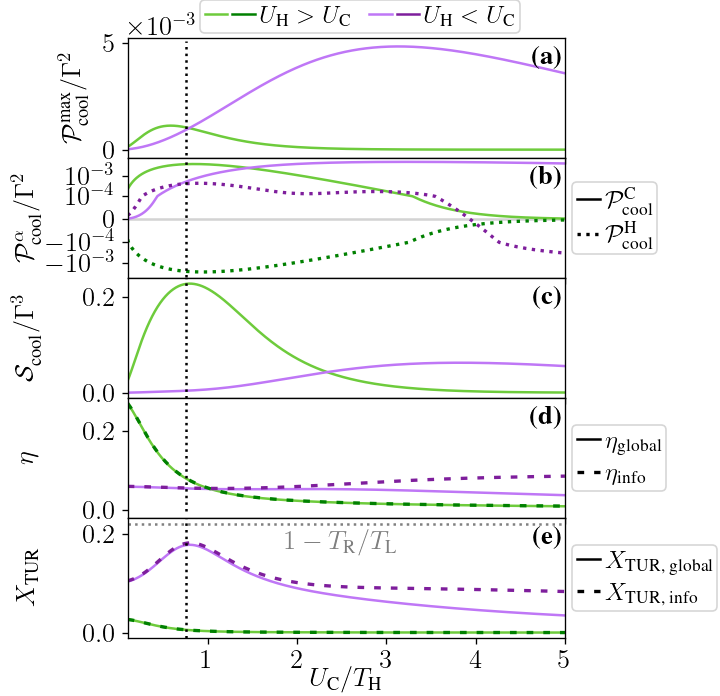

In [9]:
num = "fig_maxPcool_UC"
plt.close(num)

UCs = data.f.UC

lgd_dict = dict(ncol=1, handlelength=0.9, handletextpad=0.2,  columnspacing=0.5, labelspacing=0.3, loc="center left", fontsize=14, bbox_to_anchor=(1.005, 0.5))
lgd_dict = dict(handlelength=0.9, handletextpad=0.2, labelspacing=0.3, fontsize=15)


C1 = "xkcd:apple"
C2 = "xkcd:light purple"
C1I = "g"
C2I = "xkcd:purple"


fig, axs = plt.subplots(5, 1, sharex=True, num=num, figsize=(6, 5.8))
ax0, axCH, ax1, ax2, ax3 = axs
ax0.plot(UCs/data.f.TH, data.f.Pcool_max1, color=C1, label=r"$\Pcool^{\text{max}, \UH > \UC}$")
ax0.plot(UCs/data.f.TH, data.f.Pcool_max2, color=C2, label=r"$\Pcool^{\text{max}, \UH < \UC}$")
ax0.set_ylabel(r"$\Pcool^\text{max}/\Gamma^2$", labelpad=9)

axCH.plot([UCs[0]/data.f.TH, UCs[-1]/data.f.TH], [0, 0], color="lightgray")
axCH.set_yscale("symlog", linthresh=1e-4)
axCH.plot(UCs/data.f.TH, data.f.PcoolC1, color=C1, label=r"$\Pcool^{\C, \UH > \UC}$")
axCH.plot(UCs/data.f.TH, data.f.PcoolC2, color=C2, label=r"$\Pcool^{\C, \UH < \UC}$")
axCH.plot(UCs/data.f.TH, data.f.PcoolH1, ":", color=C1I, lw=2, label=r"$\Pcool^{\H, \UH > \UC}$")
axCH.plot(UCs/data.f.TH, data.f.PcoolH2, ":", color=C2I, lw=2, label=r"$\Pcool^{\H, \UH < \UC}$")
axCH.set_ylabel(r"$\Pcool^{\alpha}/\Gamma^2$", labelpad=2.5)

ax1.plot(UCs/data.f.TH, data.f.Scool1, color=C1, label=r"$\Scool^{\UH > \UC}$")
ax1.plot(UCs/data.f.TH, data.f.Scool2, color=C2, label=r"$\Scool^{\UH < \UC}$")
ax1.set_ylabel(r"$\Scool^{}/\Gamma^3$", labelpad=25)

ax2.plot(UCs/data.f.TH, data.f.etaG1, color=C1, label=r"$\etaG^{\UH > \UC}$")
ax2.plot(UCs/data.f.TH, data.f.etaG2, color=C2, label=r"$\etaG^{\UH < \UC}$")
ax2.plot(UCs/data.f.TH, data.f.etaI1, color=C1I, ls=(0, (2, 3)), lw=2, label=r"$\etaI^{\UH > \UC}$")
ax2.plot(UCs/data.f.TH, data.f.etaI2, color=C2I, ls=(0, (2, 3)), lw=2, label=r"$\etaI^{\UH < \UC}$")
ax2.set_ylabel(r"$\eta$", labelpad=26)

Xlim = 1 - data.f.TR/data.f.TL

ax3.plot([UCs[0]/data.f.TH, UCs[-1]/data.f.TH], Xlim*np.ones(2), ":", color="gray")
ax3.plot(UCs/data.f.TH, data.f.XTUR_G1, color=C1, label=r"$X_\text{TUR, global}^{\UH > \UC}$")
ax3.plot(UCs/data.f.TH, data.f.XTUR_G2, color=C2, label=r"$X_\text{TUR, global}^{\UH < \UC}$")
ax3.plot(UCs/data.f.TH, data.f.XTUR_I1, color=C1I, ls=(0, (2, 3)), lw=2, label=r"$X_\text{TUR, info}^{\UH > \UC}$")
ax3.plot(UCs/data.f.TH, data.f.XTUR_I2, color=C2I, ls=(0, (2, 3)), lw=2, label=r"$X_\text{TUR, info}^{\UH < \UC}$")
ax3.set_ylabel(r"$X_\text{TUR}$", labelpad=26)

p1 = ax0.plot([], [], color=C1)[0]
p1I = ax0.plot([], [], color=C1I)[0]
p2 = ax0.plot([], [], color=C2)[0]
p2I = ax0.plot([], [], color=C2I)[0]
pC = axCH.plot([], [],  color="k")[0]
pH = axCH.plot([], [], ":", lw=2, color="k")[0]
pG = ax2.plot([], [],  color="k")[0]
pI = ax2.plot([], [], lw=2, ls=(0, (2, 3)), color="k")[0]

lgd1 = fig.legend([(p1, p1I), (p2, p2I)], [r"$\UH > \UC$ ", r"$\UH < \UC$"],
                   loc="upper center",
                  ncol=2, borderaxespad=0,
                  columnspacing=0.75, handlelength=2,
                  handletextpad=0.2, labelspacing=0.3, fontsize=15,
                  handler_map={tuple: HandlerTuple(ndivide=None)})

lgd2 = axCH.legend([pC, pH], [r"$\Pcool^{\C}$", r"$\Pcool^{\H}$"],
                   loc="center left", bbox_to_anchor=(1, 0.5), **lgd_dict)
lgd3 = ax2.legend([pG, pI], [r"$\etaG$", r"$\etaI$"],
                   loc="center left", bbox_to_anchor=(1, 0.5), **lgd_dict)

lgd4 = ax3.legend([pG, pI], [r"$X_\text{TUR, global}$", r"$X_\text{TUR, info}$"],
                   loc="center left", bbox_to_anchor=(1, 0.5), **lgd_dict)


for ax, lbl in zip(axs, "abcde"):
    ylim = ax.get_ylim()
    ax.plot(np.ones(2)*pars0.UC/pars0.TH, ylim, "k:")
    ax.set_ylim(ylim)
    ax.text(0.995, 0.935, r"\textbf{(%s)" % lbl, va="top", ha="right", transform=ax.transAxes)

ax0.set_xlim(UCs[0]/pars0.TH, UCs[-1]/pars0.TH)
ax0.set_ylim(-4e-4, 5.2e-3)
axCH.set_ylim(-0.0055, 0.007)
ax2.set_ylim(-0.02, ax2.get_ylim()[1])
ax3.set_xlabel(r"$\UC/T_\H$", labelpad=-4)

ax3.text(2.5, 0.21, r"$1 - T_\R/T_\L$", va="top", ha="center", color="gray")

fig.tight_layout(pad=0.1)
fig.subplots_adjust(hspace=0, top=0.945)

plt.rc('axes.formatter', limits=(-2, 2), use_locale=False)

UC = pars0.UC

## Trajectory analysis and plots

A trajectory (loaded from the .npy file generated by the C++ code, see README) is first cut into cycles by splitting it every time the system goes back to 000. 

Each cycle is converted from the `(N+1)x3`-array format to a string $B\pm...B_N\pm_N$, with $B=C,H,L,R$ and $+$ indicating an electron jumping into a dot and $-$ out of a dot.

Then, regular expressions are used to classify the cycles by primitive cycle types (see article)

### Data analysis
Functions:

In [10]:
def index_to_occupations(i):
    """Return n_H, n_M, n_C corresponding to state index."""
    return tuple(map(int, basis[i]))


def record_to_jumpstr(record):
    """Conversion from arry format to jump string format."""
    states = record[:, 2]
    baths = record[:, 1]
    Ntot = np.array([sum(index_to_occupations(i)) for i in range(6)])[states]
    dN = Ntot[1:] - Ntot[:-1]
    return "".join([f"{'HCLR'[b]}{'-+'[dn]}" for b, dn in zip(baths[1:], dN > 0)])


def rev_cycle(cycle):
    """
    Return the time-reverse of cycle (tilde notation in the article).

    For instance, "L+R-" -> "R+L-"
    """
    signs = re.sub(r"([+-])", lambda m: "-+"[m.group() == "-"], cycle[::-2])
    return "".join([b+s for b,s in zip(cycle[-2::-2], signs)])


def get_raw_cycles_occ(record, occ_dict=None):
    """ 
    Find all the "raw" cycles in the trajectory record (array), convert them to jump strings and count the number of occurences of each cycle.
    
    Here the cycles are kept as they are, without classifying them by primitive cycle type.
    
    If occ_dict is not provided, a dictionary of cycle occurrences {cycle_string: number of occurences} is returned,
    otherwise the occurences are added to occ_dict (in place modification, nothing is returned).
    """
    states = "".join(map(str, record[:, 2]))
    cycle_start = 0
    index = 1
    cycles = []
    while index < len(states):
        index = states.find("0", index) + 1
        if index < 1:
            break
        cyc = record_to_jumpstr(record[cycle_start:index])
        cycles.append(cyc)
        cycle_start = index - 1

    if occ_dict is None:
        occ_dict = {cycle: cycles.count(cycle) for cycle in set(cycles)}
    else:
        for cycle in set(cycles):
            if cycle in occ_dict:
                occ_dict[cycle] += cycles.count(cycle)
            else:
                occ_dict[cycle] = cycles.count(cycle)
    return occ_dict


# regular expressions to identify self-retracing parts of the cycle
fR = r"(R-R\+)*"
fRC = rf"(C\+{fR}C-)*"
fRH = rf"(H\+{fR}H-)*"
fRCH = rf"(H-{fRC}H\+)*"
fRHC = rf"(C-{fRH}C\+)*"
fRCHR = rf"(R\+{fRCH}R-)*"
fRHCR = rf"(R\+{fRHC}R-)*"

fRC_RH = rf"({fRC[:-1]}|{fRH[:-1]})*"

# 0 (fully self-retracing cycle)
rC0m = fr"L\+{fRC_RH}L-"
rC0h = fr"H\+{fRCHR}H-"
rC0c = fr"C\+{fRHCR}C-"
rC0 = fr"^(({rC0m})|({rC0h})|({rC0c}))$"

rfluct = re.compile(fr"{fR}|{fRC}|{fRH}|{fRCH}|{fRHC}|{fRCHR}|{fRHCR}|{rC0m}|{rC0h}|{rC0c}")

# C_C
rCC = rf"^C\+R\+{fR}C-{fRC_RH}L-$"
# C_C time reversed
rCCt = rf"^L\+{fRH}C\+{fRHC}R-{fRHCR}C-$"
# C_H
rCH = rf"^H\+R\+{fR}H-{fRC_RH}L-$"
# C_Hb
rCHb = rf"^L\+{fRC}H\+{fRCH}R-{fRCHR}H-$"
# C_HC
rCHC = rf"^H\+R\+{fR}H-{fRH}C\+{fRHC}R-{fRHCR}C-$"
# C_HCt
rCHCt = rf"^C\+R\+{fR}C-{fRC}H\+{fRCH}R-{fRCHR}H-$"

cycles = {"0": "0", "C_HC": "H+R+H-C+R-C-",
          "C_C": "C+R+C-L-",
          "C_H": "H+R+H-L-",}
for name, cyc in list(cycles.items()):
    if name != "0":
        cycles[f"{name}_t"] = rev_cycle(cyc)
rcycles = {'0': re.compile(rC0), "C_HC": re.compile(rCHC), "C_C": re.compile(rCC), "C_H": re.compile(rCH),
           "C_HC_t": re.compile(rCHCt), "C_C_t": re.compile(rCCt), "C_H_t": re.compile(rCHb)}


def get_primitive_cycles_occ(raw_occ):
    """Return the occurences of each type of cycle from the raw occurence dict (as given by get_raw_cycles_occ())."""
    cycles = {"0": "0", "C_HC": "H+R+H-C+R-C-",
              "C_C": "C+R+C-L-",
              "C_H": "H+R+H-L-",}
    for name, cyc in list(cycles.items()):
        if name != "0":
            cycles[f"{name}_t"] = rev_cycle(cyc)
    occ_cycles = {c: 0 for c in cycles}
    extra_cycles = []

    for c, f in raw_occ.items():
        for cc, rc in rcycles.items():
            if rc.search(c):
                occ_cycles[cc] += f
                break
    assert sum(occ_cycles.values()) == sum(raw_occ.values())  # check that all cycles were classified
    return occ_cycles




Example of how to get `trajs_pars.npz` from the generated data from the C++ code (assuming $\mu_R = 0$)

In the provided data, the trajectories are stored as `record<i>` entries instead of the `.npy` files generated by the C++ code
because it allows compressing the data.

In [11]:
# # 1. Get raw cycle occurrences
# raw_occ = {}

# # if the trajectories are in .npy files
# data_path = "/path/to/generated/trajs/folder"
# files = glob(os.path.join(data_path, "trajectory-*-*.npy"))  # list of all trajectory files
# Ntraj = len(files)  # trajectory number
# params = np.load(os.path.join(data_path, "parameters.npz"))   # parameters
# pars = Params(**{k: params[k][0] for k in params})

# for fpath in files:
#     record = np.load(fpath)
#     get_raw_cycles_occ(record, raw_occ)

# # 2. Get primitive cycle occurrences
# occ_cycles = get_primitive_cycles_occ(raw_occ)
# Ncyc = sum(occ_cycles.values())  # total cycle number

# # 3. Compute cycle level thermodynamic quanties (see article) 
# UC, UH, bC, bH, bL, bR, eC, eH, eW = pars.get("UC, UH, bC, bH, bL, bR, eC, eH, eW")
# dn_cycles = {"0": 0,
#              "C_HC": 0, "C_HC_t": 0,
#              "C_C": -1, "C_C_t": 1,
#              "C_H": -1, "C_H_t": 1,
# }
# QR_cycles = {"0": 0,
#              "C_HC": (UH-UC), "C_HC_t": (-UH + UC),
#              "C_C": (eW + UC), "C_C_t": (-eW - UC),
#              "C_H": (eW + UH), "C_H_t": (-eW - UH),
# }
# QL_cycles = {"0": 0,
#              "C_HC": 0, "C_HC_t": 0,
#              "C_C": -eW, "C_C_t": eW,
#              "C_H": -eW, "C_H_t": eW,
# }
# QH_cycles = {"0": 0,
#              "C_HC": -UH, "C_HC_t": UH,
#              "C_C": 0, "C_C_t": 0,
#              "C_H": -UH, "C_H_t": UH,
# }
# QC_cycles = {"0": 0,
#              "C_HC": UC, "C_HC_t": -UC,
#              "C_C": -UC, "C_C_t": UC,
#              "C_H": 0, "C_H_t": 0,
# }
# Sig_cycles = {"0": 0,
#              "C_HC": -(bC-bR)*UC - (bR-bH)*UH, "C_HC_t": (bC-bR)*UC + (bR-bH)*UH,
#              "C_C": (bC-bR)*UC - (bR-bL)*eW, "C_C_t": -(bC-bR)*UC + (bR-bL)*eW,
#              "C_H": (bH-bR)*UH - (bR-bL)*eW, "C_H_t": -(bH-bR)*UH + (bR-bL)*eW,
# }

# p000, p001, p010, p011, p100, p110 = pars.rho_ss().flatten()
# Ic = log(p001*p010/p000/p011)
# Ih = log(p100*p010/p000/p110)
# Ihc = Ih - Ic
# I_cycles = {"0": 0,
#              "C_HC": Ihc, "C_HC_t": -Ihc,
#              "C_C": Ic, "C_C_t": -Ic,
#              "C_H": Ih, "C_H_t": -Ih,
# }
# SigW_cycles = {cyc: -bL*QL_cycles[cyc] - bR*QR_cycles[cyc] +  I_cycles[cyc] for cyc in QR_cycles.keys()}
# SigD_cycles = {cyc: -bC*QC_cycles[cyc] - bH*QH_cycles[cyc] - I_cycles[cyc] for cyc in QR_cycles.keys()}

# keys = list(occ_cycles.keys())
# np.savez_compressed("trajs_pars.npz",
#         Ncyc=Ncyc, Ntraj=Ntraj,
#         cycles=keys,
#         occ_cycles=[occ_cycles[k] for k in keys],
#         dn_cycles=[dn_cycles[k] for k in keys],
#         QR_cycles=[QR_cycles[k] for k in keys],
#         QL_cycles=[QL_cycles[k] for k in keys],
#         QH_cycles=[QH_cycles[k] for k in keys],
#         QC_cycles=[QC_cycles[k] for k in keys],
#         Sig_cycles=[Sig_cycles[k] for k in keys],
#         I_cycles=[I_cycles[k] for k in keys],
#         SigW_cycles=[SigW_cycles[k] for k in keys],
#         SigD_cycles=[SigD_cycles[k] for k in keys],
#         **pars.get_pars(), bC=bC, bH=bH, bL=bL, bR=bR
# )

Example with a subset of trajectories stored in `trajs_pars1.npz`

In [12]:
# 1. Get raw cycle occurrences
raw_occ = {}

data = np.load("trajs_pars1.npz")
files = [f"record{i}" for i in range(50)]
Ntraj = len(files)  # trajectory number

for fpath in files:
    record = data[fpath]
    get_raw_cycles_occ(record, raw_occ)

# 2. Get primitive cycle occurrences
occ_cycles = get_primitive_cycles_occ(raw_occ)
Ncyc = sum(occ_cycles.values())  # total cycle number

print(f"Ntraj: {Ntraj}, Ncyc: {Ncyc}")
print(occ_cycles)

Ntraj: 50, Ncyc: 158897
{'0': 158530, 'C_HC': 0, 'C_C': 246, 'C_H': 0, 'C_HC_t': 21, 'C_C_t': 78, 'C_H_t': 22}


### Plot trajectories

In [13]:
xcycles = ['0', 'C_C', 'C_C_t', 'C_H','C_H_t', 'C_HC', 'C_HC_t']

xcycle_labels = [r"$\cC_0$",  r"$\CC$", r"$\tCC$", r"$\CH$", r"$\tCH$", r"$\CHC$" , r"$\tCHC$"]

colors = ["C7", COLD, COLD, HOT, HOT, MIX, MIX]

ylims_weighted = np.array([
    [ 5.00000000e-07,  2.06059737e+00],
    [-2.07674074e-03,  6.44196448e-03],
    [-1.80579868e-03,  4.62277402e-03],
    [-1.39420774e-03,  3.84320077e-03],
    [-2.83471967e-03,  4.93164931e-03],
    [-2.72867571e-05,  8.01828423e-05]
])

ylims_ss = -0.004, 0.3

#### Case (I)

In [14]:
data_cyc1 = np.load("trajs_pars1.npz")
p_cycles1 = data_cyc1.f.occ_cycles/data_cyc1.f.Ncyc

rates1 = np.array(pars1.rates())
mTcyc1 = pars1.mean_cycle_time()

print(f""""
              \t Pcool  \t JN
       theory:\t {pars1.JQR():.4e}\t {pars1.JN():.4e}
 trajectories:\t {sum(data_cyc1.f.QR_cycles*data_cyc1.f.occ_cycles)/data_cyc1.f.tf/data_cyc1.f.Ntraj:.4e}\t {sum(data_cyc1.f.dn_cycles*data_cyc1.f.occ_cycles)/data_cyc1.f.tf/data_cyc1.f.Ntraj:.4e}
""")


"
              	 Pcool  	 JN
       theory:	 1.0424e-03	 -1.3728e-04
 trajectories:	 1.0616e-03	 -1.3764e-04



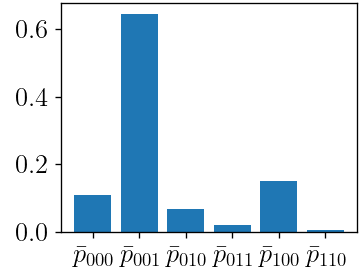

In [15]:
basis2 = [r"$\bar{p}_{%s}$" % state for state in basis]

num = "fig_Pss_pars1"
rho_ss1 = pars1.rho_ss().flatten()

plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(3, 2.25))
ax.bar(np.arange(6), rho_ss1, lw=0)

ax.set_xticks(np.arange(6))
ax.set_xticklabels(basis2)

fig.tight_layout(pad=0.1)


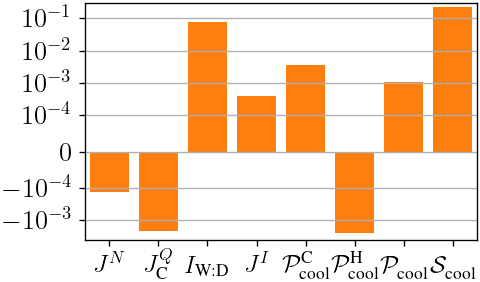

In [16]:
num = "fig_ss_currents_pars1"

plt.close(num)
fig1, ax1 = plt.subplots(num=num, figsize=(4, 2.35))

FC, FH = pars1.fluxes()
qties = [pars1.JN(), pars1.JQC(), pars1.I_WD()[0], pars1.JID()[0],
         FC*data_cyc1.f.QR_cycles[2], FH*data_cyc1.f.QR_cycles[3],
         pars1.JQR(), pars1.S_JERJER()]
ax1.bar(np.arange(len(qties)), qties, color="C1")
ax1.set_xticks(np.arange(len(qties)))
ax1.set_xticklabels([r"$J_{}^{N}$", r"$\vspace{-0.2cm}J^Q_\C$",  r"${I}_{\W:\D}$",
                     r"$J^I_{}$", r"$\Pcool^{\C}$", r"$\Pcool^{\H}$"
                     , r"$\Pcool^{}$", r"$\Scool^{}$"], va='baseline', fontsize=15)
ax1.tick_params(axis='x', which='major', pad=16)
ax1.grid(axis="y")
ax1.set_yscale("symlog", linthresh=1e-4)
ax1.set_ylim(ylims_ss)
ax1.set_xlim(-0.5, len(qties)-0.5)
fig1.tight_layout(pad=0.1)

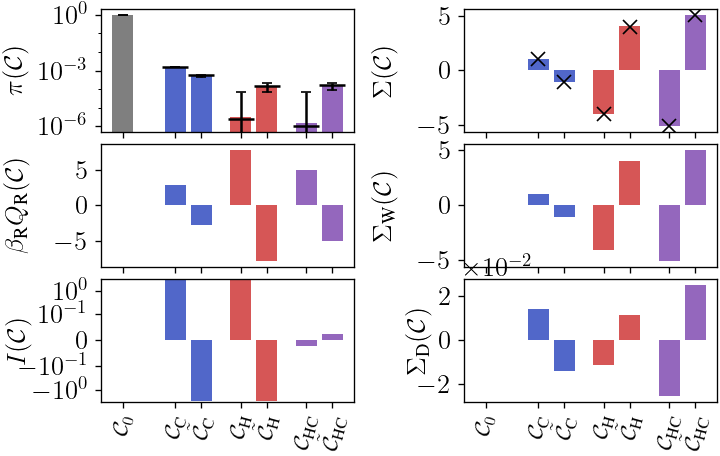

In [17]:
num = "fig_thermo_per_cycle_pars1"
plt.close(num)

fig, axs = plt.subplots(3, 2, sharex=True, num=num, figsize=(6, 3.8))
width = 0.32
offset = 0.2
xticks = [0] + sorted(list(np.arange(1, 4)-offset) + list(np.arange(1, 4)+offset))
lbls = [r"$\pi(\mathcal{C})$", r"$\Sigma(\cC)$", r"$\beta_\R{Q}_\R(\cC)$", r"$\Sigma_\W(\cC)$", r"$I(\cC)$", r"$\Sigma_\D(\cC)$"]
pads = [6, 12, 15, 12, -8, -8]

cycs = list(data_cyc1.f.cycles)
inds = np.array([cycs.index(cyc) for cyc in xcycles])
ax = axs[0, 0]

qty = p_cycles1
bars = qty[inds]
pbar = ax.bar(xticks, bars, width=width, bottom=0.5e-6, color=colors, yerr=1/sqrt(data_cyc1.f.Ncyc)),
ax.set_xticks(xticks)
ax.set_ylabel(lbls[0], labelpad=pads[0])

for ax, qty, label, pad in zip(axs.flatten()[1:],
                               [data_cyc1.f.Sig_cycles, data_cyc1.f.bR*data_cyc1.f.QR_cycles,
                                data_cyc1.f.SigW_cycles, data_cyc1.f.I_cycles, data_cyc1.f.SigD_cycles],
                               lbls[1:], pads[1:]):
    bars = qty[inds]
    pbar = ax.bar(xticks, bars, width=width, #bottom=1e-6,
                  color=colors)
    #
    ax.set_xticks(xticks)
    ax.set_ylabel(label, labelpad=pad)

pC, pbC = p_cycles1[cycs.index("C_C")], p_cycles1[cycs.index("C_C_t")]
pH, pbH = p_cycles1[cycs.index("C_H")], p_cycles1[cycs.index("C_H_t")]
pHC, pbHC = p_cycles1[cycs.index("C_HC")], p_cycles1[cycs.index("C_HC_t")]
Sig_trajs = [log(pC/pbC),-log(pC/pbC), log(pH/pbH), -log(pH/pbH), log(pHC/pbHC), -log(pHC/pbHC)]

axs[0, 0].plot(xticks[1:], rates1[inds[1:]-1]*mTcyc1, "_", color="k", ms=16, mew=1.5)
axs[0, 1].plot(xticks[1:], Sig_trajs, "kx", ms=8)

axs[-1, 0].set_xticklabels(xcycle_labels, fontsize=14, rotation=75)
axs[-1, 1].set_xticklabels(xcycle_labels, fontsize=14, rotation=75)
axs[-1, 0].set_yticks([-2, 0, 2])
axs[-1, 1].set_yticks([-2e-2, 0, 2e-2])
axs[-1, 0].set_yscale("symlog", linthresh=1e-1)
axs[0, 0].set_yscale("log")
axs[0, 0].set_yticks([1e-6, 1e-3, 1])
axs[0, 0].set_yticks(10**np.arange(-6., 0, 1.), minor=True)
axs[0, 0].set_yticklabels([], minor=True)
fig.tight_layout(pad=0.1)
fig.subplots_adjust(wspace=0.43, top=0.98, hspace=0.1)

#### Case (II)

In [18]:
data_cyc2 = np.load("trajs_pars2.npz")
p_cycles2 = data_cyc2.f.occ_cycles/data_cyc2.f.Ncyc

rates2 = np.array(pars2.rates())
mTcyc2 = pars2.mean_cycle_time()

print(f""""
              \t Pcool  \t JN
       theory:\t {pars2.JQR():.4e}\t {pars2.JN():.4e}
 trajectories:\t {sum(data_cyc2.f.QR_cycles*data_cyc2.f.occ_cycles)/data_cyc2.f.tf/data_cyc2.f.Ntraj:.4e}\t {sum(data_cyc2.f.dn_cycles*data_cyc2.f.occ_cycles)/data_cyc2.f.tf/data_cyc2.f.Ntraj:.4e}
""")


"
              	 Pcool  	 JN
       theory:	 9.1657e-04	 9.2773e-05
 trajectories:	 9.1002e-04	 9.3408e-05



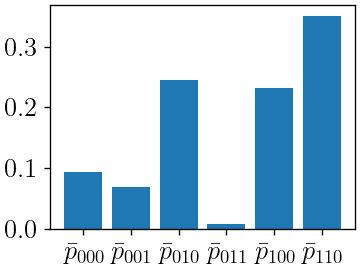

In [19]:
basis2 = [r"$\bar{p}_{%s}$" % state for state in basis]

num = "fig_Pss_pars2"
rho_ss2 = pars2.rho_ss().flatten()

plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(3, 2.25))
ax.bar(np.arange(6), rho_ss2, lw=0)

ax.set_xticks(np.arange(6))
ax.set_xticklabels(basis2)

fig.tight_layout(pad=0.2)


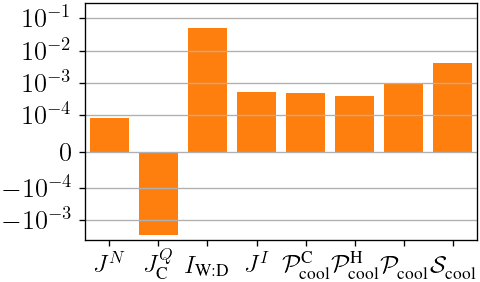

In [20]:
num = "fig_ss_currents_pars2"

plt.close(num)
fig2, ax2 = plt.subplots(num=num, figsize=(4, 2.35))

FC, FH = pars2.fluxes()
qties = [pars2.JN(), pars2.JQC(), pars2.I_WD()[0], pars2.JID()[0],
         FC*data_cyc2.f.QR_cycles[2], FH*data_cyc2.f.QR_cycles[3],
         pars2.JQR(), pars2.S_JERJER()]
ax2.bar(np.arange(len(qties)), qties, color="C1")
ax2.set_xticks(np.arange(len(qties)))
ax2.set_xticklabels([r"$J_{}^{N}$", r"$\vspace{-0.2cm}J^Q_\C$",  r"${I}_{\W:\D}$",
                     r"$J^I_{}$", r"$\Pcool^{\C}$", r"$\Pcool^{\H}$"
                     , r"$\Pcool^{}$", r"$\Scool^{}$"], va='baseline', fontsize=15)
ax2.tick_params(axis='x', which='major', pad=16)
ax2.grid(axis="y")
ax2.set_yscale("symlog", linthresh=1e-4)
ax2.set_ylim(ylims_ss)
ax2.set_xlim(-0.5, len(qties)-0.5)
fig2.tight_layout(pad=0.1)

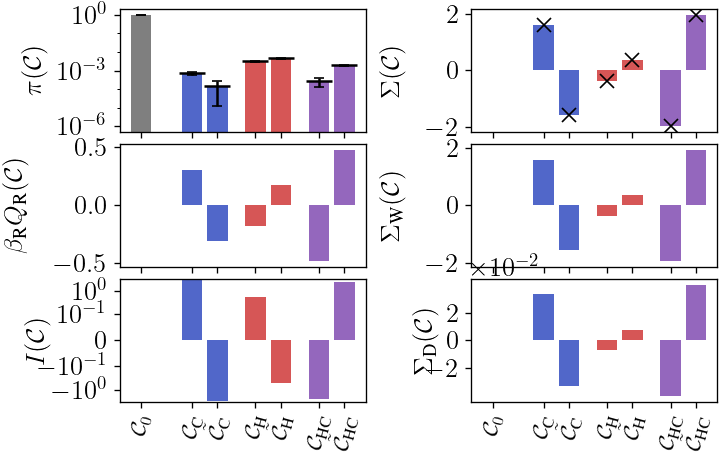

In [21]:
num = "fig_thermo_per_cycle_pars2"
plt.close(num)

fig, axs = plt.subplots(3, 2, sharex=True, num=num, figsize=(6, 3.8))
width = 0.32
offset = 0.2
xticks = [0] + sorted(list(np.arange(1, 4)-offset) + list(np.arange(1, 4)+offset))
lbls = [r"$\pi(\mathcal{C})$", r"$\Sigma(\cC)$", r"$\beta_\R{Q}_\R(\cC)$", r"$\Sigma_\W(\cC)$", r"$I(\cC)$", r"$\Sigma_\D(\cC)$"]
pads = [6, 12, 15, 12, -8, -8]

cycs = list(data_cyc2.f.cycles)
inds = np.array([cycs.index(cyc) for cyc in xcycles])
ax = axs[0, 0]

qty = p_cycles2
bars = qty[inds]
pbar = ax.bar(xticks, bars, width=width, bottom=0.5e-6, color=colors, yerr=1/sqrt(data_cyc2.f.Ncyc)),
ax.set_xticks(xticks)
ax.set_ylabel(lbls[0], labelpad=pads[0])

for ax, qty, label, pad in zip(axs.flatten()[1:],
                               [data_cyc2.f.Sig_cycles, data_cyc2.f.bR*data_cyc2.f.QR_cycles,
                                data_cyc2.f.SigW_cycles, data_cyc2.f.I_cycles, data_cyc2.f.SigD_cycles],
                               lbls[1:], pads[1:]):
    bars = qty[inds]
    pbar = ax.bar(xticks, bars, width=width,
                  color=colors)
    #
    ax.set_xticks(xticks)
    ax.set_ylabel(label, labelpad=pad)

pC, pbC = p_cycles2[cycs.index("C_C")], p_cycles2[cycs.index("C_C_t")]
pH, pbH = p_cycles2[cycs.index("C_H")], p_cycles2[cycs.index("C_H_t")]
pHC, pbHC = p_cycles2[cycs.index("C_HC")], p_cycles2[cycs.index("C_HC_t")]
Sig_trajs = [log(pC/pbC),-log(pC/pbC), log(pH/pbH), -log(pH/pbH), log(pHC/pbHC), -log(pHC/pbHC)]

axs[0, 0].plot(xticks[1:], rates2[inds[1:]-1]*mTcyc2, "_", color="k", ms=16, mew=1.5)
axs[0, 1].plot(xticks[1:], Sig_trajs, "kx", ms=8)

axs[-1, 0].set_xticklabels(xcycle_labels, fontsize=14, rotation=75)
axs[-1, 1].set_xticklabels(xcycle_labels, fontsize=14, rotation=75)
axs[-1, 0].set_yticks([-2, 0, 2])
axs[-1, 1].set_yticks([-2e-2, 0, 2e-2])
axs[-1, 0].set_yscale("symlog", linthresh=1e-1)
axs[0, 0].set_yscale("log")
axs[0, 0].set_yticks([1e-6, 1e-3, 1])
axs[0, 0].set_yticks(10**np.arange(-6., 0, 1.), minor=True)
axs[0, 0].set_yticklabels([], minor=True)
fig.tight_layout(pad=0.1)
fig.subplots_adjust(wspace=0.43, top=0.98, hspace=0.1)